<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_excel('/content/weightheight.xlsx')
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

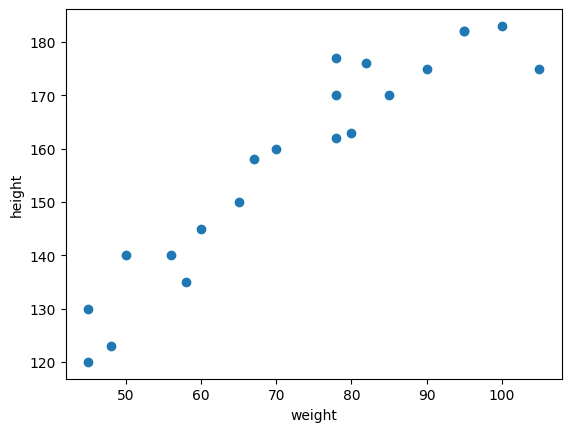

In [23]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel('height')

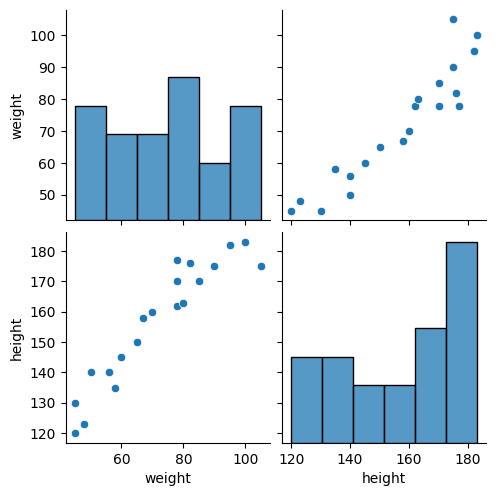

In [24]:
import seaborn as sns
sns.pairplot(df)

## pairplot shows bar graph and scatter plot at the same time

Above plot shows that height and weight are linearly corelated

In [25]:
##Independent and dependent features
X=df[['weight']]
## independent feature(weight in our case) should be data frame or 2D array

#Libraries like scikit-learn, which are commonly used for building machine learning models in Python,
#expect input data to be in the form of a 2D array or matrix.
#This is a standard convention across many machine learning libraries.

y=df['height']
## dependent feature(height in our case) can be series or 1D array

In [26]:
## train test split
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
X_train

,weight
11,95
3,60
18,56
16,45
13,100
2,48
9,78
20,67
4,70
12,105


In [41]:
## Standardization
from sklearn.preprocessing import StandardScaler

#Standardization is beneficial when the features have different scales or units.
#It ensures that each feature contributes equally to the model's learning process
#and prevents features with larger scales from dominating the learning process.

In [42]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [31]:
X_train

array([[ 1.12170052],
       [-0.84784053],
       [-1.07293094],
       [-1.69192955],
       [ 1.40306353],
       [-1.52311175],
       [ 0.1650663 ],
       [-0.45393232],
       [-0.28511451],
       [ 1.68442654],
       [ 0.84033752],
       [ 0.3901567 ],
       [ 0.55897451],
       [-0.56647752],
       [ 0.2776115 ]])

We use fit_transform for training data as it finds means and standard deviation to be used by test data where as only transform for test data. If we use fit_tranform for test data as well then it will calculate mean and sd for testing dataset and we do not want training dataset to know anything about the testing dataset

In [32]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)

##  regression.fit will always accept 2D array (X in our case) output maybe 1D

LinearRegression()

In [33]:
print("Coefficient or slope",regression.coef_)
print("Intercept",regression.intercept_)

## slope and intercept

Coefficient or slope [17.13313141]
Intercept 160.0


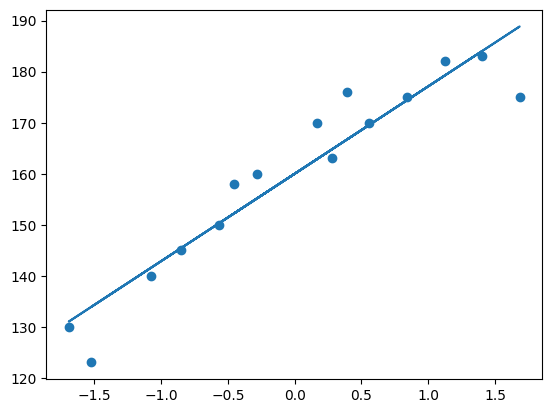

In [44]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [35]:
y_pred=regression.predict(X_test)
y_pred

array([131.01194866, 135.83257804, 162.82810257, 143.54558505,
       179.21824246, 162.82810257])

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error is",mse)
print("Mean Absolute Error is",mae)
print("Root Mean Squared Error is",rmse)

Mean Squared Error is 70.15400808383112
Mean Absolute Error is 6.917785534007
Root Mean Squared Error is 8.375798951970559


In [37]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print(score)

0.8633067606073869


In [38]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8291334507592336

In [40]:
pred_height=regression.predict(scaler.transform([[72]]))
print('Predicted Height',pred_height)

Predicted Height [157.04334731]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
